# Creator Name: Rasandeep Singh Panag


In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf


from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from patsy import dmatrix
print("the link from where I have taken this data is https://www.figure-eight.com/data-for-everyone/")


the link from where I have taken this data is https://www.figure-eight.com/data-for-everyone/


# Description
This dataset is a collection of English sentence pairs. The crowd was asked about the truth value of the second sentence if the first sentence were true and to what extent the sentences are related on a scale of 1 to 5. The variance of this score over the crowd’s judgments is included as well.

This File I got from the previous link that I had given in the code. So, in this dataset I will make first 70% of my data as my training data, and the remaining data will be my Test data

This data set has 10 features and one outcome as you can see below. 
Also this data set has 555 outcomes that we have to deal with

In [3]:
# modify the path to the CSV file as necessary
rasan = pd.read_csv('file1.csv')
rasan.head()


,sentenceA,sentenceB,if_sentence_a_is_true_then,to_what_extent_are_the_two_sentences_expressing_a_related_meaning,to_what_extent__are_the_two_sentences_expressing_a_related_meaning_variance,"Dummy variable for ""Sentence B is true""","Dummy variable for ""Sentence B is false""",Number of words in sentence A,Number of words in Sentence B,reshape_the_column_D,reshape_the_column_E
0,A girl is riding a horse,A girl is riding a brown horse,Sentence B cannot be said to be true or false,4.40,0.490,0,0,6,7,1,0
1,A man is riding a skateboard in a park,A man is riding a skateboard,Sentence B is true,4.77,0.421,1,0,9,6,1,0
2,A woman is eating and drinking with other women,Some women are eating and drinking,Sentence B is true,4.92,0.266,1,0,9,6,1,0
3,A person is playing a drum,A red car is on the shirt of a man,Sentence B cannot be said to be true or false,1.00,0.000,0,0,6,10,0,0
4,A cat is resting on a chair,An onion is being cut by a man,Sentence B cannot be said to be true or false,1.00,0.000,0,0,7,8,0,0


## Simple Linear Regression
I used simple linear regression by making 70 percent of the data as the training data and remaining data as the test data. 
In the section of features I added four features extra which were not present in the default file those are "'Dummy variable for "Sentence B is true"','Dummy variable for "Sentence B is false"', 'Number of words in sentence A', 'Number of words in Sentence B'"

The two features "'Dummy variable for "Sentence B is true"','Dummy variable for "Sentence B is false"' I used because  the feature "if_sentence_a_is_true_then" is qualitative variable with three values if sentence B is true, false or otherwise

As the feature "sentenceA" and "sentence B" are the lines so I just add two more features to make a use of it. Those two features are:
#### 'Number of words in sentence A': counts the words in sentence A
#### 'Number of words in Sentence B': counts the words in sentence B

In [5]:
X = rasan[[ 'to_what_extent_are_the_two_sentences_expressing_a_related_meaning', 'Dummy variable for "Sentence B is true"','Dummy variable for "Sentence B is false"', 'Number of words in sentence A', 'Number of words in Sentence B']]

y = rasan['to_what_extent__are_the_two_sentences_expressing_a_related_meaning_variance']

In [6]:

# diving the set into training set and test set
X_train = X[0:389]
X_test = X[389:]

y_train = y[0:389]
y_test = y[389:]

In [7]:

linmod2 = LinearRegression()

linmod2.fit(X_train, y_train)

preds = linmod2.predict(X_test)

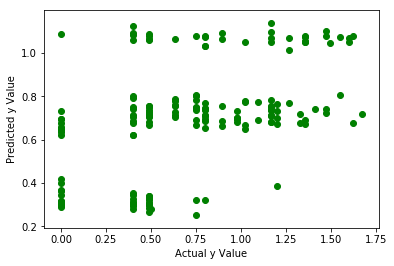

In [8]:
plt.scatter(y_test, preds,color='g')
plt.xlabel("Actual y Value")
plt.ylabel("Predicted y Value")
plt.show()

## Mean Square Error

In [9]:
mse = mean_squared_error(y_test, preds)
print(mse)

0.15654624874934572


## R-square

In [10]:
rs = r2_score(y_test, preds)
print(rs)

0.2255406216605097


22.5% variation in the data is explained by its features. 

# Classification
## Linear Discriminant Analysis

As for the classification we need data with some binary values due to which I had to add two extra features: 
#### reshape_the_column_D: if to_what_extent_are_the_two_sentences_expressing_a_related_meaning > 3 =1 , otherwise = 0
#### reshape_the_column_E' : if to_what_extent__are_the_two_sentences_expressing_a_related_meaning_variance > 0.5 =1, otherwise = 0


In [ ]:
rasan_train= rasan[0:389]

X_train1 = rasan_train[['Dummy variable for "Sentence B is true"', 'Dummy variable for "Sentence B is false"','Number of words in sentence A', 'Number of words in Sentence B','reshape_the_column_D']]

y_train1 = rasan_train['reshape_the_column_E']

lda = LinearDiscriminantAnalysis()
lda.fit(X_train1, y_train1)

## For the test data

In [52]:
rasan_test = rasan[390:554]

X_test1 = rasan_test[['Dummy variable for "Sentence B is true"', 'Dummy variable for "Sentence B is false"','Number of words in sentence A', 'Number of words in Sentence B','reshape_the_column_D']]

y_test1 = rasan_test['reshape_the_column_E']


preds = lda.predict(X_test1)

conf = confusion_matrix(y_test1, preds, labels=lda.classes_)
print('Confusion matrix:\n')
print(lda.classes_)
print(conf)
acc = accuracy_score(y_test1, preds)
print('\nThe accuracy is: ', acc)

Confusion matrix:

[0 1]
[[33 39]
 [ 4 88]]

The accuracy is:  0.7378048780487805


# KNN

## training

In [58]:
knn = KNeighborsClassifier(5)
knn.fit(X_train1, y_train1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Testing and evaluation

In [62]:
knn_preds = knn.predict(X_test1)

conf = confusion_matrix(y_test1, knn_preds, labels=knn.classes_)
print('Confusion matrix:\n')
print(knn.classes_)
print(conf)
acc = accuracy_score(y_test1, knn_preds)
print('\nThe accuracy is: ', acc)

Confusion matrix:

[0 1]
[[41 31]
 [24 68]]

The accuracy is:  0.6646341463414634


# Logistic Regression
## For the training data

In [19]:
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
print(X_train1.columns.values)
print(logreg.coef_)

['Dummy variable for "Sentence B is true"'
 'Dummy variable for "Sentence B is false"' 'reshape_the_column_D']
[[-2.16151379  1.14084181  0.14962807]]


## Testing data

In [21]:
preds = logreg.predict(X_test1)
conf = confusion_matrix(y_test1, preds)
print(logreg.classes_)
print(conf)

acc = accuracy_score(y_test1, preds)
print('accuracy is: ', acc)

[0 1]
[[33 39]
 [ 4 88]]
('accuracy is: ', 0.73780487804878048)


## Getting Probabilistic Predictions

In [41]:
preds = logreg.predict_proba(X_test1)
classes = logreg.classes_

threshold = 0.52

newpreds = []
for p in preds:
    if p[0] > threshold:
        newpreds.append(classes[0])
    else:
        newpreds.append(classes[1])

print(logreg.classes_)        
conf = confusion_matrix(y_test1, newpreds)
print(conf)

acc = accuracy_score(y_test1, newpreds)
print('accuracy is: ', acc)


[0 1]
[[33 39]
 [ 4 88]]
('accuracy is: ', 0.73780487804878048)


In [42]:
precision_recall_fscore_support(y_test1, newpreds, average='binary')

(0.69291338582677164, 0.95652173913043481, 0.80365296803652975, None)

precision = 0.69291338582677164
Recall = 0.9565217391304348
Fscore = 0.80365296803652975

In [48]:
p_pred = [p[0] for p in preds] # probability of the positive class
pos_class = logreg.classes_[0]

# convert class labels to True or False
newlabs = (y_test1 == pos_class)


auc = roc_auc_score(newlabs, p_pred)
print(auc)

0.712484903382


# Feature Selection

In [53]:
# features and outcome variable

X1 = rasan.drop(['to_what_extent__are_the_two_sentences_expressing_a_related_meaning_variance'], axis=1)

# encode categorical variables as numeric variables using the get_dummies() function
X1 = pd.get_dummies(X)
y1 = rasan['to_what_extent__are_the_two_sentences_expressing_a_related_meaning_variance']

train_size = 389
X_full_train = X[0:train_size]
X_full_test = X[train_size:]

y_train2 = y[0:train_size]
y_test2 = y[train_size:] 

perc = 50 # percentage of features to keep 

selector = SelectPercentile(f_regression, percentile=perc)
selector.fit_transform(X_full_train, y_train2)
selected_cols = selector.get_support()
selected_feas = X_full_train.columns.values[selected_cols]
print("These are the feas that were selected:\n")
print(selected_feas)

X_sub_train = X_full_train[selected_feas]

X_sub_test = X_full_test[selected_feas] 


These are the feas that were selected:

['Dummy variable for "Sentence B is true"'
 'Dummy variable for "Sentence B is false"']


The MSE using just the selected features is 0.1587313442921222


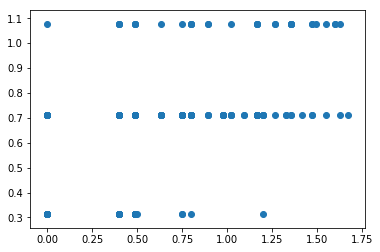

In [55]:
lm_sub = LinearRegression()
lm_sub.fit(X_sub_train, y_train2)

preds_sub = lm_sub.predict(X_sub_test)
mse_sub = mean_squared_error(y_test2, preds_sub)
print("The MSE using just the selected features is %s" % mse_sub)

plt.figure()
plt.scatter(y_test2, preds_sub)
plt.show()

In [56]:
rs = r2_score(y_test2, preds_sub)
print(rs)

0.21473060385944043


21% of the model is explained by its features

# Cross Validation

The MSE using cross validation on the entire dataset is 0.1742252795523606


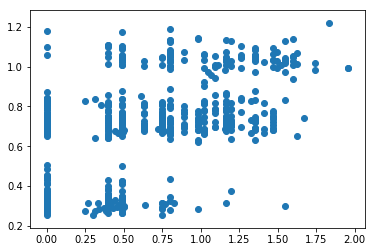

In [50]:
kf = KFold(n_splits=10)

preds_cv = []

for train, test in kf.split(X1):
    X_cv = X.iloc[train]
    y_cv = y.iloc[train]
    
    X_cv_test = X.iloc[test]
    
    lm_cv = LinearRegression()
    lm_cv.fit(X_cv, y_cv)
    preds = lm_cv.predict(X_cv_test)
    preds_cv += list(preds)

mse_cv = mean_squared_error(y, preds_cv)
print("The MSE using cross validation on the entire dataset is %s" % mse_cv)

plt.figure()
plt.scatter(y, preds_cv)
plt.show()



In [51]:
rs = r2_score(y, preds_cv)
print(rs)

0.2328109873056664


23 % of the model is explained by its features

 # The Lasso
 

The MSE using cross validation and the Lasso on the entire dataset is 0.230009917968


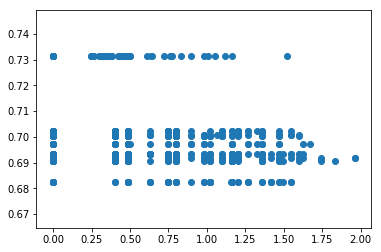

In [36]:
kf = KFold(n_splits=10)

preds_cv = []

for train, test in kf.split(X1):
    X_cv = X.iloc[train]
    y_cv = y.iloc[train]
    
    X_cv_test = X.iloc[test]
    
    lm_cv = Lasso(max_iter=5000, tol=0.001)
    lm_cv.fit(X_cv, y_cv)
    preds = lm_cv.predict(X_cv_test)
    preds_cv += list(preds)

mse_cv = mean_squared_error(y, preds_cv)
print("The MSE using cross validation and the Lasso on the entire dataset is %s" % mse_cv)

plt.figure()
plt.scatter(y, preds_cv)
plt.show()


In [45]:
rs = r2_score(y, preds_cv)
print(rs)

-0.0128328238528


1.2% of the data is explained by its features. 